# Podstawy przetwarzania sygnałów - LAB

    prowadzący: Monika Wasilewska
    Politechnika Wrocławska, Katedra Akustyki, Multimediów i Przetwarzania Sygnałów
    Proszę nie rozpowszechniać plików z zajęć - z góry dziękuję :)

Run a cell via `Shift + Return`. Learn more about [CoCalc Jupyter Notebooks](https://doc.cocalc.com/jupyter.html).

### Aleksandra Baranowska 253083

Proszę wpisać swoje dane po dwukrotnym kliknięciu myszką w komórkę. Dokładnie tam gdzie jest imię wpisujecie swoje imię itd.!

### Zajęcia 6

1. Zapoznanie się z ideą filtracji.
2. Zaprojektowanie filtrów FIR
3. Do czego mogą jeszcze służyć filtry? HRTF jako przykład filtru dającego sporo radości ;)
___

In [1]:
pkg load signal

### Zadanie 1

Wygeneruj jedną sekundę sygnału świergotowego o częstotliwości początkowej $f_p = 200 [Hz]$, częstotliwości końcowej $f_k=1200[Hz]$ i częstotliwości próbkowania równej $f_s=3000 [Hz]$. Czas narastania częstotliwości niech będzie równy długości jego trwania. Wyrysuj przebieg czasowy i widmo tego sygnału.

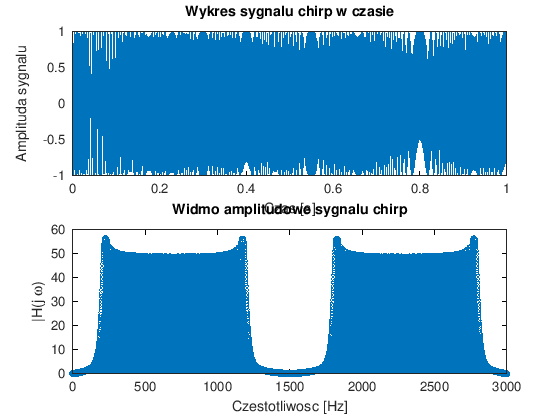

In [2]:
% tutaj jest miejsce na napisanie kodu


f_start = 200;
f_stop = 1200;
fs = 3000;
delta_t = 1/fs;
t = 0:delta_t:1-delta_t;

sig = chirp(t,f_start,1,f_stop);

abs_fft_sig = abs(fft(sig));
f_step = fs/length(abs_fft_sig);
f = 0:f_step:fs-f_step;

figure
subplot(2,1,1);
plot(t,sig);
title('Wykres sygnalu chirp w czasie');
xlabel('Czas [s]');
ylabel('Amplituda sygnalu');

subplot(2,1,2);
stem(f,abs_fft_sig);
title('Widmo amplitudowe sygnalu chirp');
xlabel('Czestotliwosc [Hz]');
ylabel('|H(j \omega)');





## Odpowiedź impulsowa filtru

Zaprojektujmy odpowiedź impulsową filtru FIR. Odpowiedź impulsowa filtru FIR na pobudzenie impulsowe δ[n] będące deltą Kroneckera jest równa zbiorowi współczynników filtru.

### Zadanie 2
Korzystając z funkcji __fir1__ zaprojektuj filtr dolnoprzepustowy o $M=101$ współczynnikach i częstotliwości odcięcia równej $f_c=800[Hz]$. Wyrysuj odpowiedź impulsową filtru.

(**Wskazówka:** odpowiedź impulsowa filtru jest związana z dziedziną czasu i jest wynikiem działania funkcji fir1. Doczytaj w dokumentacji w jaki sposób podać częstotliwość odcięcia do funkcji fir1)

**Pytanie:** Czy na podstawie samej odpowiedzi impulsowej jesteś w stanie stwierdzić o poprawności (zgodności z treścią zadania) zaprojektowanego filtru?

In [7]:
% help fir1

ans = 101


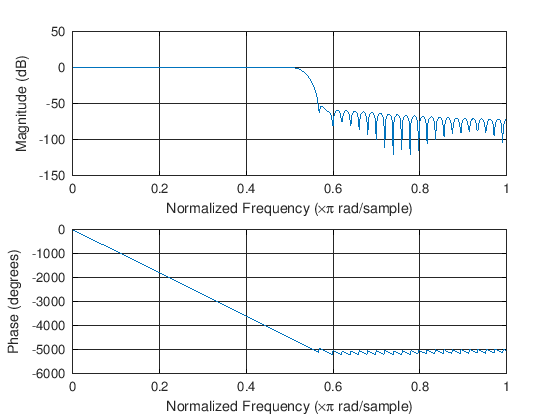

In [3]:
% tutaj jest miejece na napisanie kodu

M = 101;
fc = 800/(fs/2);
y = fir1(M-1,fc,'low');
length(y)

freqz(y)



**Tutaj jest miejsce na odpowiedź**

Odpowiedź:

## Transmitancja filtru

Aby obserwować charakterystykę naszego filtru w dziedzinie częstotliwości będziemy korzystać z pojęcia transmitancji. Przypomnijmy zatem czym ona jest.

**Transmitancja jest transformatą Fouriera odpowiedzi impulsowej (czyli zbioru współczynników filtru).**


### Zadanie 3
Aby zaobserwować właściwości zaprojektowanego przez nas filtru w dziedzinie częstotliwości chcemy zobaczyć jak wygląda moduł transmitancji czyli charakterystyka częstotliwościowa filtru.
W tym zadaniu **wyrysuj moduł widma stworzonych wcześniej współczynników**. Pamiętaj o opisaniu osi oraz nadaniu tytułu.

**Pytanie** Czy na podstawie stworzonego wykresu jesteś w stanie określić czy filtr został zaprojektowany poprawnie? Na podstawie którego jest zrobić to łatwiej? W swojej analizie porównaj intuicyjność wykresów przedstawiających odpowiedź impulsową oraz moduł transmitancji.

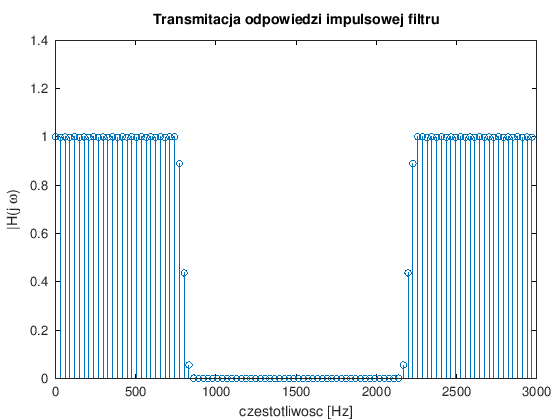

In [8]:
% tutaj jest miejsce na napisanie kodu


tran = abs(fft(y));

fstep = fs/length(tran);
f2 = 0:fstep:fs-fstep;

figure
stem(f2,tran);
title('Transmitacja odpowiedzi impulsowej filtru');
xlabel('czestotliwosc [Hz]');
ylabel('|H(j \omega)');



**Tutaj jest miejsce na odpowiedź do zadania 3**

Odpowiedź:

## Filtracja

Filtracja w czasie wymaga obliczenia splotu z odpowiedzią impulsową filtru, natomiast przechodząc do dziedziny częstotliwości (korzystając z transmitancji) splot zamienia się w mnożenie.

### Zadanie 4

Za pomocą funkcji `filter` przefiltruj sygnał stworzony w zadaniu pierwszym w dziedzinie czasu oraz wyrysuj jego przebieg czasowy po filtracji.

**Wskazówka:** Funkcja `filter` będzie przyjmowała trzy argumenty `filter(h,1,x)` gdzie `h` oraz `x` to odpowiednio współczynniki filtru oraz sygnał w czasie.



In [8]:
% help filter

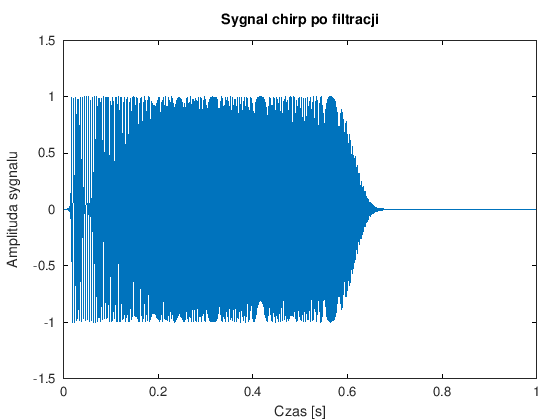

In [9]:
% tutaj jest miejsce na napisanie kodu


fir_sig = filter(y,1,sig);

figure
plot(t,fir_sig);
title('Sygnal chirp po filtracji');
xlabel('Czas [s]');
ylabel('Amplituda sygnalu');



### Zadanie 5 

Aby obliczyć wynik filtracji w dziedzinie częstotliwości (mając wynik filtracji w dziedzinie czasu) wystarczy obliczyć ponownie transformatę Fouriera. Wyrysuj widmo amplitudowe obliczone na podstawie przefiltrowanego już sygnału.

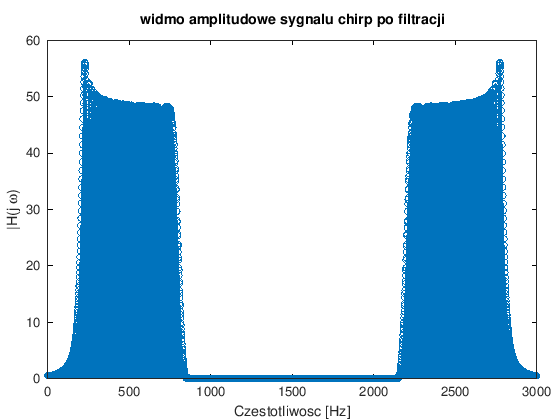

In [10]:
% tutaj jest miejsce na napisanie kodu


fir_sig_fft_abs = abs(fft(fir_sig));

fstep = fs/length(fir_sig_fft_abs);
f3 = 0:fstep:fs-fstep;

figure
stem(f3,fir_sig_fft_abs);
title('widmo amplitudowe sygnalu chirp po filtracji');
xlabel('Czestotliwosc [Hz]');
ylabel('|H(j \omega)');


## Podsumowanie

Podsumujmy nasze dzisiejsze doświadczenia - udało nam się zaprojektować swój pierwszy filtr cyfrowy!

### Zadanie 6

W pierwszej komórce poniżej narysuj pod sobą wszystkie wykresy w dziedzinie czasu (sygnał w czasie, odpowiedź impulsowa filtru oraz sygnał w czasie po filtracji). Możesz skorzystać z funkcji `subplot`.

W kolejnej komórce poniżej narysuj pod sobą wszystkie wykresy w dziedzinie częstotliwości (widmo amplitudowe sygnału, moduł transmitancji oraz moduł widma sygnału po filtracji). Możesz skorzystać z funkcji `subplot`.

Powinieneś móc zauważyć, że filtracja w dziedzinie częstotliwości to faktycznie mnożenie! :)

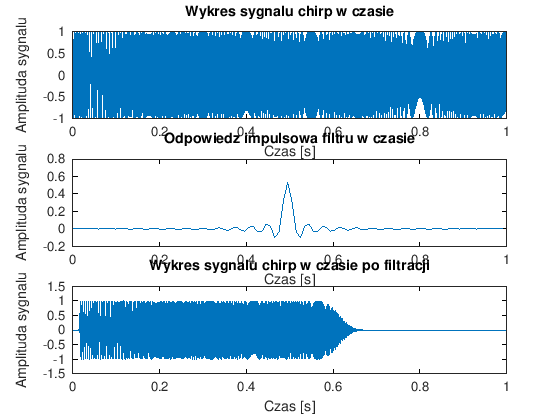

In [11]:
% wykresy w dziedzinie czasu


fs2 = length(y);
delta_t2 = 1/fs2;
t2 = 0:delta_t2:1-delta_t2;

figure
subplot(3,1,1);
plot(t,sig);
title('Wykres sygnalu chirp w czasie');
xlabel('Czas [s]');
ylabel('Amplituda sygnalu');

subplot(3,1,2);
plot(t2,y);
title('Odpowiedz impulsowa filtru w czasie');
xlabel('Czas [s]');
ylabel('Amplituda sygnalu');

subplot(3,1,3);
plot(t,fir_sig);
title('Wykres sygnalu chirp w czasie po filtracji');
xlabel('Czas [s]');
ylabel('Amplituda sygnalu');


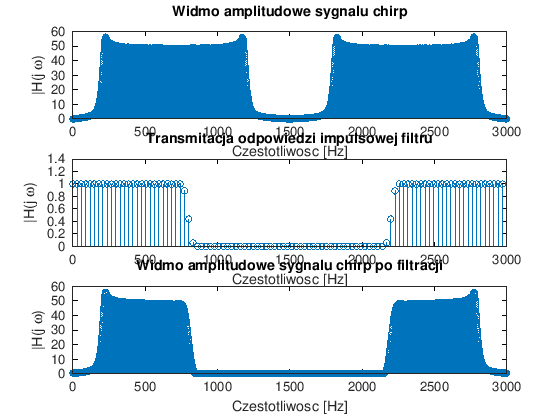

In [13]:
% wykresy w dziedzinie częstotliwości

figure
subplot(3,1,1);
stem(f,abs_fft_sig);
title('Widmo amplitudowe sygnalu chirp');
xlabel('Czestotliwosc [Hz]');
ylabel('|H(j \omega)');

subplot(3,1,2);
stem(f2,tran);
title('Transmitacja odpowiedzi impulsowej filtru');
xlabel('Czestotliwosc [Hz]');
ylabel('|H(j \omega)');

subplot(3,1,3);
stem(f3,fir_sig_fft_abs);
title('Widmo amplitudowe sygnalu chirp po filtracji');
xlabel('Czestotliwosc [Hz]');
ylabel('|H(j \omega)');


___

## Do czego jeszcze mogą służyć filtry?

Jednymi z bardziej spektakularnych efektów mogą się pochwalić filtry HRTF, które są związane z dźwiękiem przestrzennym.

Człowiek słyszy przestrzennie dzięki analizie amplitudy, fazy oraz widma dźwięku dochodzącego do naszych uszu. Dźwięk padający z danego punktu, na przykład z prawej strony, dotrze do prawego ucha szybciej i z większą amplitudą niż do lewego. Korzystając z tych właściwości stworzone zostały współczynniki filtrów, które umożliwiają stworzenie wrażenia dochodzenia dźwięku z konkretnego miejsca w przestrzeni. Jak na pewno się spodziewacie mamy dwa osobne zestawy współczynników dla lewgo i prawego kanału dźwięku stereo, a na wyjście (gdzie użytkownik ma podłączone słuchawki) wysyłamy odpowiednio zmodyfikowany sygnał dla lewgo i prawego ucha ;). Sama filtracja absolutnie niczym się nie różni! To nadal tylko dodawanie i mnożenie... Podłączcie słuchawki i włączcie link poniżej.

https://www.youtube.com/watch?v=c6SDKfHCDm8

P.S. Mam nadzieję, że już rozumiecie dlaczego zdarza mi się powtarzać, że przetwarzanie sygnałów jest fascynujące i może sprawiać mnóstwo frajdy. Czyż to nie jest piękna dziedzina nauki? :)

___